In [10]:
#先引入后面分析、可视化等可能用到的库
import tushare as ts
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   
#df是使用tushare获取的沪深300数据
from matplotlib.gridspec import GridSpec
#要重新安装 mpl_finance 代替matplotlib.finance才能用
import mpl_finance as mpf
import matplotlib.ticker as ticker
from matplotlib.pylab import date2num
import seaborn as sns
sns.set()

#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [6]:
import tushare as ts
token='换成你自己的tokents.set_token(token)
pro = ts.pro_api(token)
#代码和数据获取
def get_data(code,start='20190101',end='20190712'):
    df=ts.pro_bar(ts_code=code,asset='I',adj='qfq', start_date=start, end_date=end)
    return df

In [8]:
df = pro.index_daily(ts_code='000300.SH', start_date='20190101')
df = df.sort_values(by='trade_date', ascending=True)
df['trade_date2'] = df['trade_date'].copy()
df['trade_date'] = pd.to_datetime(df['trade_date']).map(date2num)
df.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,trade_date2
142,000300.SH,737061.0,2969.5353,3017.0674,3018.7759,2958.4883,3010.6536,-41.1183,-1.3658,68663021.0,7.610557e+07,20190102
141,000300.SH,737062.0,2964.8421,2963.0186,3000.4413,2953.2548,2969.5353,-4.6932,-0.1580,70867103.0,7.666480e+07,20190103
140,000300.SH,737063.0,3035.8741,2940.1916,3036.8147,2935.8295,2964.8421,71.0320,2.3958,103318972.0,1.071410e+08,20190104
139,000300.SH,737066.0,3054.3030,3055.1535,3061.7490,3035.9123,3035.8741,18.4289,0.6070,101164359.0,1.057039e+08,20190107
138,000300.SH,737067.0,3047.7035,3049.8747,3055.5100,3038.5339,3054.3030,-6.5995,-0.2161,86170585.0,7.962888e+07,20190108


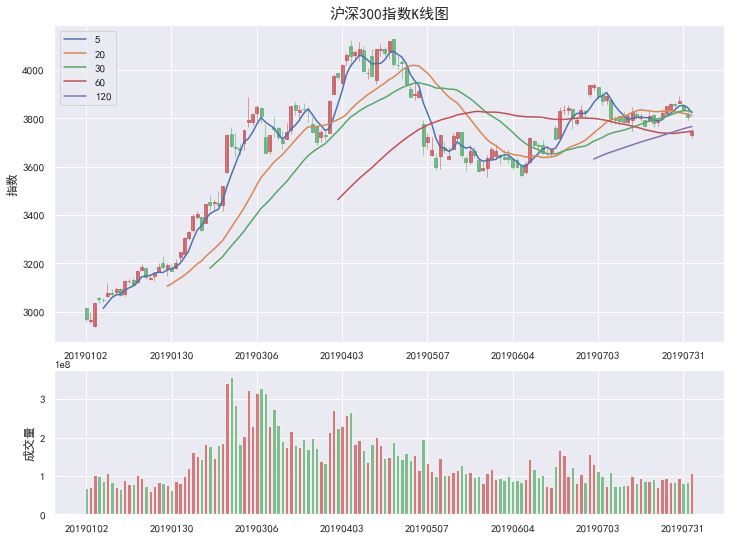

In [11]:
#设定日期格式
def format_date(x,pos):
    if x<0 or x>len(date_tickers)-1:
        return ''
    return date_tickers[int(x)]

#提取原始日期格式
df['dates'] = np.arange(0, len(df))
date_tickers = df.trade_date2.values
# 画子图
figure = plt.figure(figsize=(12, 9))
gs = GridSpec(3, 1)
ax1 = plt.subplot(gs[:2, :])
ax2 = plt.subplot(gs[2, :])

# 画K线图
mpf.candlestick_ochl(
    ax=ax1,
    quotes=df[['dates', 'open', 'close', 'high', 'low']].values,
    width=0.7,
    colorup='r',
    colordown='g',
    alpha=0.7)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))

# 画均线，均线可使用talib来计算
for ma in ['5', '20', '30', '60', '120']:
    df[ma]=df.close.rolling(int(ma)).mean()
    ax1.plot(df['dates'], df[ma])
ax1.legend()
ax1.set_title('沪深300指数K线图', fontsize=15)
ax1.set_ylabel('指数')

# 画成交量
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
df['up'] = df.apply(lambda row: 1 if row['close'] >= row['open'] else 0, axis=1)
ax2.bar(df.query('up == 1')['dates'], df.query('up == 1')['vol'], color='r', alpha=0.7)
ax2.bar(df.query('up == 0')['dates'], df.query('up == 0')['vol'], color='g', alpha=0.7)
ax2.set_ylabel('成交量')
plt.show()